In [58]:
%matplotlib inline
import json
import urllib2
import os
from tables import open_file
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from alleninf.api import get_probes_from_genes
from alleninf.data import get_values_at_locations
from alleninf.api import get_mni_coordinates_from_wells#
from alleninf.analysis import fixed_effects, approximate_random_effects, bayesian_random_effects
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale
import math 
sns.set_style('white')
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 999

api_url = "http://api.brain-map.org/api/v2/data/query.json"
ahba_dir  = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/SEPT10/AHBA'


drop_strings = ['coords_native', 'donor_names', 'struct_id', 
                #'top_struct', 
                'struct_name', 
                'Mean', 'Median', 
                'PC1', 'PC2','PC3', 'SVD1g', 'SVD2g','SVD3g', 'SVD1p', 'SVD2p','SVD3p', 
                'corrected_mni_x', 'corrected_mni_y', 'corrected_mni_z', 'Unnamed: 0']

In [79]:
def return_expression_df(geneset):
    
    df = pd.read_csv(os.path.join(ahba_dir, 'AHBA_%s.csv'%geneset),index_col=-15).sort_index()
    #df = pd.read_csv(os.path.join(ahba_dir, 'AHBA_%s.csv'%geneset),index_col=0).groupby(GABA.index).mean()
    
    df = df.drop(drop_strings,axis=1).groupby(df.index).mean()
    df = pd.DataFrame(scale(df), index= df.index, columns = df.columns)
    return df 

IRON_H           = return_expression_df('IRON_HOMEOSTASIS_PCA')
IRON_D           = return_expression_df('IRON_D_PCA')
IRON_IH          = return_expression_df('IRON_ION_HOMEOSTASIS_PCA')
IRON_IM          = return_expression_df('IRON_ION_IMPORT_PCA')
IRON_IB          = return_expression_df('IRON_ION_BINDING_PCA')
IRON_T1          = return_expression_df('IRON_TRANSPORT1_PCA')
IRON_T2          = return_expression_df('IRON_TRANSPORT2_PCA')
IRON_R           = return_expression_df('IRON_RESPONSE_PCA')
ANMC             = return_expression_df('ANMC_PCA')
DA_met           = return_expression_df('DA_metabolism_PCA')
DA_receptor_sig  = return_expression_df('DA_receptor_sig_PCA')
DA_receptor_bind = return_expression_df('DA_receptor_PCA')
DA_transmission  = return_expression_df('DA_tranmission_PCA')
DA_transport     = return_expression_df('DA_transport_PCA')
ANMC             = return_expression_df('ANMC_PCA')
GLU              = return_expression_df('GLU_PCA')
GABA             = return_expression_df('GABA_PCA')
GLU_GABA         = return_expression_df('GLU_GABA_PCA')
FTH_ALL          = return_expression_df('FTH_ALL_PCA')
FERRITIN         = return_expression_df('FERRITIN_PCA')
TCA              = return_expression_df('TCA_PCA') 
DRD_ALL          = return_expression_df('DRD_ALL_PCA')

GLU              = return_expression_df('GLU_PCA')
GABA             = return_expression_df('GABA_PCA')

In [103]:
cmap = 'RdBu'

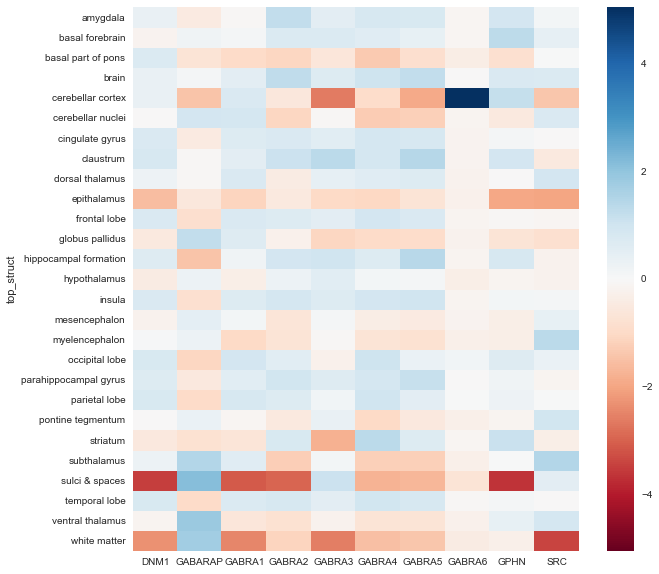

In [104]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(GABA, cmap=cmap)
#plt.savefig('/Users/kanaan/Desktop/GABA.png')

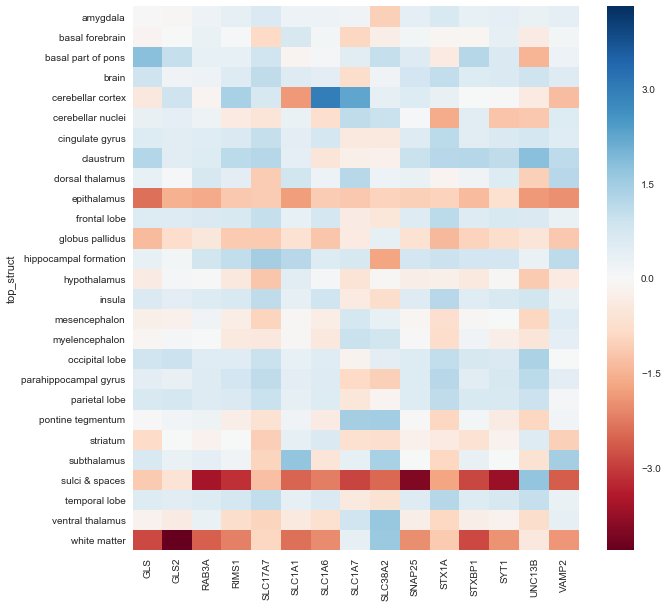

In [105]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(GLU, cmap=cmap)
#plt.savefig('/Users/kanaan/Desktop/GABA.png')

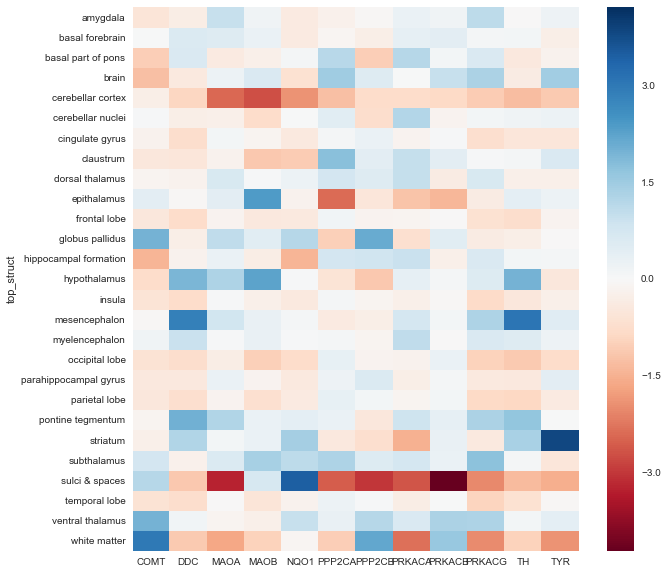

In [107]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(DA_met, cmap=cmap)
#plt.savefig('/Users/kanaan/Desktop/GABA.png')

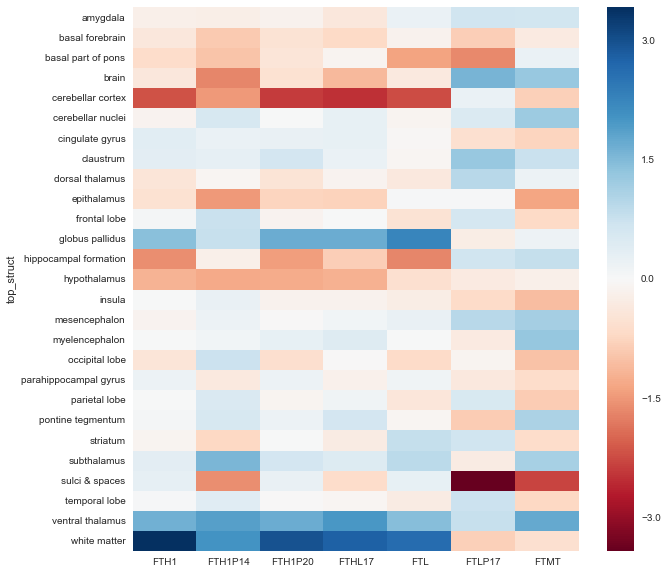

In [109]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(FERRITIN, cmap=cmap)
#plt.savefig('/Users/kanaan/Desktop/GABA.png')